In [2]:
!pip install tensorflow

# Numpy

In [3]:
import numpy as np
np.random.seed(42)
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn import datasets

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### Load dataset from train file and start analisys

In [4]:
# Open the train file for reading...
train = pd.read_csv('train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             3774 non-null   object 
 1   customerID        3774 non-null   object 
 2   gender            3774 non-null   object 
 3   SeniorCitizen     3774 non-null   int64  
 4   Partner           3774 non-null   object 
 5   Dependents        3774 non-null   object 
 6   tenure            3774 non-null   int64  
 7   PhoneService      3774 non-null   object 
 8   MultipleLines     3774 non-null   object 
 9   InternetService   3774 non-null   object 
 10  OnlineSecurity    3774 non-null   object 
 11  OnlineBackup      3774 non-null   object 
 12  DeviceProtection  3774 non-null   object 
 13  TechSupport       3774 non-null   object 
 14  StreamingTV       3774 non-null   object 
 15  StreamingMovies   3774 non-null   object 
 16  Contract          3774 non-null   object 


In [6]:
# Describe numeric columns
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3774.000000,3774.000000,3774.000000
mean,0.161897,31.983042,64.809539
std,0.368405,24.333353,30.148628
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,28.000000,70.550000
75%,0.000000,54.000000,89.900000
max,1.000000,72.000000,118.600000


## Clean attributes
### Delete rows with missing values

## Have to start to define function that will be called for test dataset, because train and test must have the same transformations

In [7]:
# define a function to reuse for test dataset
def t001(train):
    print("Check for missing values: in case (simply) delete the corresponding rows...")
    for i in train.columns:
        n_missing = train[i].isna().sum()
        print(n_missing, "<=", i )
        if (n_missing>0):
            # Assuming n_missing << len(train) then delete rows with blank strings
            train = train[train[i].isna() == False]
    return train

train = t001(train)

Check for missing values: in case (simply) delete the corresponding rows...
0 <= Churn
0 <= customerID
0 <= gender
0 <= SeniorCitizen
0 <= Partner
0 <= Dependents
0 <= tenure
0 <= PhoneService
0 <= MultipleLines
0 <= InternetService
0 <= OnlineSecurity
0 <= OnlineBackup
0 <= DeviceProtection
0 <= TechSupport
0 <= StreamingTV
0 <= StreamingMovies
0 <= Contract
0 <= PaperlessBilling
0 <= PaymentMethod
0 <= MonthlyCharges
0 <= TotalCharges


In [8]:
# define a function to reuse for test dataset
def t002(train):
    print("Check for empty or blank strings: in case (simply) delete the corresponding rows...")
    # using is_numeric_dtype() from https://stackoverflow.com/a/45568211
    for i in train.columns:
        if not is_numeric_dtype(train[i]):
            n_empty_or_blank = (train[i].str.strip() == '').sum()
            print(n_empty_or_blank, "<=", i )
            if (n_empty_or_blank>0):
                # Assuming n_empty_or_blank << len(train) then delete rows with blank strings
                train = train[train[i].str.strip() != '']
    return train

train = t002(train)

Check for empty or blank strings: in case (simply) delete the corresponding rows...
0 <= Churn
0 <= customerID
0 <= gender
0 <= Partner
0 <= Dependents
0 <= PhoneService
0 <= MultipleLines
0 <= InternetService
0 <= OnlineSecurity
0 <= OnlineBackup
0 <= DeviceProtection
0 <= TechSupport
0 <= StreamingTV
0 <= StreamingMovies
0 <= Contract
0 <= PaperlessBilling
0 <= PaymentMethod
8 <= TotalCharges


In [9]:
# print remaining rows
len(train)

3766

In [10]:
# print number and the unique values for each attribute (column of train)
for i in train.columns:
    print("Unique on", i,":", len(train[i].unique()), train[i].unique()) 

Unique on Churn : 2 ['No' 'Yes']
Unique on customerID : 3766 ['1769-GRUIK' '4933-IKULF' '2096-XOTMO' ... '3635-JBPSG' '4475-NVTLU'
 '2038-YSEZE']
Unique on gender : 2 ['Female' 'Male']
Unique on SeniorCitizen : 2 [0 1]
Unique on Partner : 2 ['No' 'Yes']
Unique on Dependents : 2 ['No' 'Yes']
Unique on tenure : 72 [18 17 16 36  1 13 67  8 62  4 21 51 24 64 43 59  3 72 63  9 31 14 19 71
 12 47 69 65 10 20  7 11 22 58  2  5 68 41 23 42 15 33 55 61 39 56 54 70
 48 34 26 27 57 25 49 35 37 40 46 50 53 60 32  6 29 30 45 44 52 28 38 66]
Unique on PhoneService : 2 ['Yes' 'No']
Unique on MultipleLines : 3 ['No' 'Yes' 'No phone service']
Unique on InternetService : 3 ['Fiber optic' 'No' 'DSL']
Unique on OnlineSecurity : 3 ['No' 'No internet service' 'Yes']
Unique on OnlineBackup : 3 ['No' 'No internet service' 'Yes']
Unique on DeviceProtection : 3 ['No' 'No internet service' 'Yes']
Unique on TechSupport : 3 ['No' 'No internet service' 'Yes']
Unique on StreamingTV : 3 ['No' 'No internet service' 'Y

In [11]:
# print numerosity of unique values, if the unique values<=4 for each attribute (column of train)
for i in train.columns:
    uarr = train[i].unique()
    if len(uarr)<=4:
        print("On", i,":")
        for u in range(len(uarr)):
            print(uarr[u], "#", len(train[train[i] == uarr[u]]))

On Churn :
No # 2753
Yes # 1013
On gender :
Female # 1834
Male # 1932
On SeniorCitizen :
0 # 3155
1 # 611
On Partner :
No # 1974
Yes # 1792
On Dependents :
No # 2661
Yes # 1105
On PhoneService :
Yes # 3402
No # 364
On MultipleLines :
No # 1812
Yes # 1590
No phone service # 364
On InternetService :
Fiber optic # 1649
No # 814
DSL # 1303
On OnlineSecurity :
No # 1881
No internet service # 814
Yes # 1071
On OnlineBackup :
No # 1622
No internet service # 814
Yes # 1330
On DeviceProtection :
No # 1658
No internet service # 814
Yes # 1294
On TechSupport :
No # 1862
No internet service # 814
Yes # 1090
On StreamingTV :
No # 1484
No internet service # 814
Yes # 1468
On StreamingMovies :
No # 1479
No internet service # 814
Yes # 1473
On Contract :
Month-to-month # 2088
One year # 817
Two year # 861
On PaperlessBilling :
Yes # 2224
No # 1542
On PaymentMethod :
Electronic check # 1265
Mailed check # 875
Bank transfer (automatic) # 818
Credit card (automatic) # 808


In [12]:
# define a function to reuse for test dataset
def t003(train):
    # Drop 'customerID' column: no info, because one for each customer
    if 'customerID' in train.columns:
        train = train.drop(['customerID'], axis=1)
    # Set correct dtype to numeric attribute (float or int)
    train = train.astype({'SeniorCitizen':int, 'tenure': int, 'MonthlyCharges':float, 'TotalCharges':float})
    return train

train = t003(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3766 entries, 0 to 3773
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             3766 non-null   object 
 1   gender            3766 non-null   object 
 2   SeniorCitizen     3766 non-null   int32  
 3   Partner           3766 non-null   object 
 4   Dependents        3766 non-null   object 
 5   tenure            3766 non-null   int32  
 6   PhoneService      3766 non-null   object 
 7   MultipleLines     3766 non-null   object 
 8   InternetService   3766 non-null   object 
 9   OnlineSecurity    3766 non-null   object 
 10  OnlineBackup      3766 non-null   object 
 11  DeviceProtection  3766 non-null   object 
 12  TechSupport       3766 non-null   object 
 13  StreamingTV       3766 non-null   object 
 14  StreamingMovies   3766 non-null   object 
 15  Contract          3766 non-null   object 
 16  PaperlessBilling  3766 non-null   object 


<AxesSubplot:xlabel='InternetService', ylabel='count'>

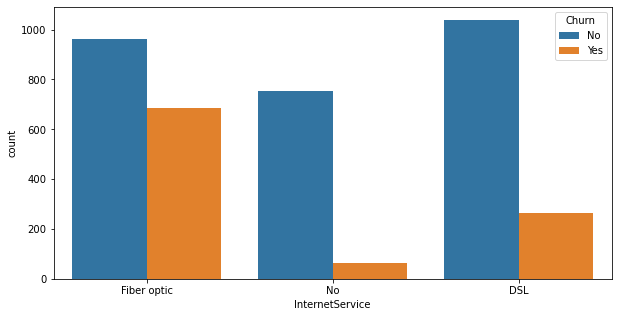

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(10,5))
sns.countplot(x=train['InternetService'], hue=train['Churn'])

### Churn rate is higher in case of Fiber optic Internet Service

## In order to evaluate heatmap, apply some transformation to the dataset

In [14]:
# transform_dataset, define a function to reuse for test dataset
def t004(train):
    # Transfom Yes/No values into 0/1
    for i in ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
        train[i] = train[i].map({'Yes':1, 'No':0})

    # Transfom Male/Female values into 0/1
    train['gender'] =  train['gender'].map({'Male':0, 'Female':1})

    # One Hot Encoding
    train = pd.get_dummies(train, columns=['InternetService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'])
    
    return train

    # So now, no texts into data

train = t004(train) # transform_dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3766 entries, 0 to 3773
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    3766 non-null   int64  
 1   gender                                   3766 non-null   int64  
 2   SeniorCitizen                            3766 non-null   int32  
 3   Partner                                  3766 non-null   int64  
 4   Dependents                               3766 non-null   int64  
 5   tenure                                   3766 non-null   int32  
 6   PhoneService                             3766 non-null   int64  
 7   PaperlessBilling                         3766 non-null   int64  
 8   MonthlyCharges                           3766 non-null   float64
 9   TotalCharges                             3766 non-null   float64
 10  InternetService_DSL                      3766 no

In [15]:
# Check for outliers, over 3 sigma
for i in train.columns:
    print("#Outliers on", i,":", len(train[((train[i] - train[i].mean()) / train[i].std()).abs() > 3]))

#Outliers on Churn : 0
#Outliers on gender : 0
#Outliers on SeniorCitizen : 0
#Outliers on Partner : 0
#Outliers on Dependents : 0
#Outliers on tenure : 0
#Outliers on PhoneService : 364
#Outliers on PaperlessBilling : 0
#Outliers on MonthlyCharges : 0
#Outliers on TotalCharges : 0
#Outliers on InternetService_DSL : 0
#Outliers on InternetService_Fiber optic : 0
#Outliers on InternetService_No : 0
#Outliers on MultipleLines_No : 0
#Outliers on MultipleLines_No phone service : 364
#Outliers on MultipleLines_Yes : 0
#Outliers on OnlineSecurity_No : 0
#Outliers on OnlineSecurity_No internet service : 0
#Outliers on OnlineSecurity_Yes : 0
#Outliers on OnlineBackup_No : 0
#Outliers on OnlineBackup_No internet service : 0
#Outliers on OnlineBackup_Yes : 0
#Outliers on DeviceProtection_No : 0
#Outliers on DeviceProtection_No internet service : 0
#Outliers on DeviceProtection_Yes : 0
#Outliers on TechSupport_No : 0
#Outliers on TechSupport_No internet service : 0
#Outliers on TechSupport_Yes :

### Attribute PhoneService is 1 for majority of rows (90%) and then drop out rows with PhoneService==0.
### And then drop PhoneService and 'MultipleLines_No phone service' column.
### After that  'MultipleLines_No' became identical to 'MultipleLines_Yes' so drop 'MultipleLines_No' too.

In [16]:
# define a function to reuse for test dataset
def t005(train):
    # Retain rows with 'PhoneService' == 1
    train = train[train['PhoneService'] == 1]

    # Drop 'PhoneService' column: it's just a column of 1
    if 'PhoneService' in train.columns:
        train = train.drop(['PhoneService'], axis=1)

    # Drop 'MultipleLines_No phone service' column: it's just a column of 1
    if 'MultipleLines_No phone service' in train.columns:
        train = train.drop(['MultipleLines_No phone service'], axis=1)

    # Drop 'MultipleLines_No' column: it's identical to 'MultipleLines_Yes'
    if 'MultipleLines_No' in train.columns:
        train = train.drop(['MultipleLines_No'], axis=1)
    return train

train = t005(train)
len(train)

3402

<AxesSubplot:>

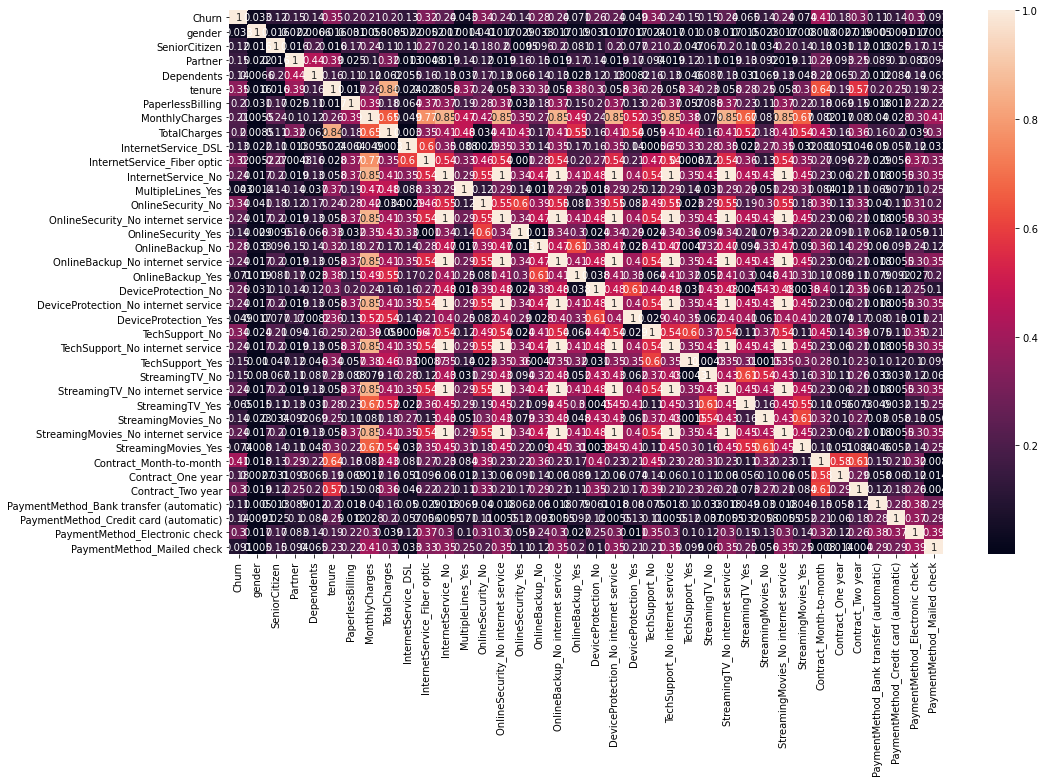

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(16,10))
sns.heatmap(data=train.corr().abs(), annot=True)

In [18]:
def t006(train):
    # As can be seen from the heatmap, drop the column identical to 'InternetService_No' (814 at 1)
    train = train.drop([
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
    ], axis = 1)

    #Attribute gender is unrelated to each other, so has to be dropped
    # Drop 'gender' column: it's just a column of 1
    if 'gender' in train.columns:
        train = train.drop(['gender'], axis=1)
    return train

train = t006(train)

<AxesSubplot:>

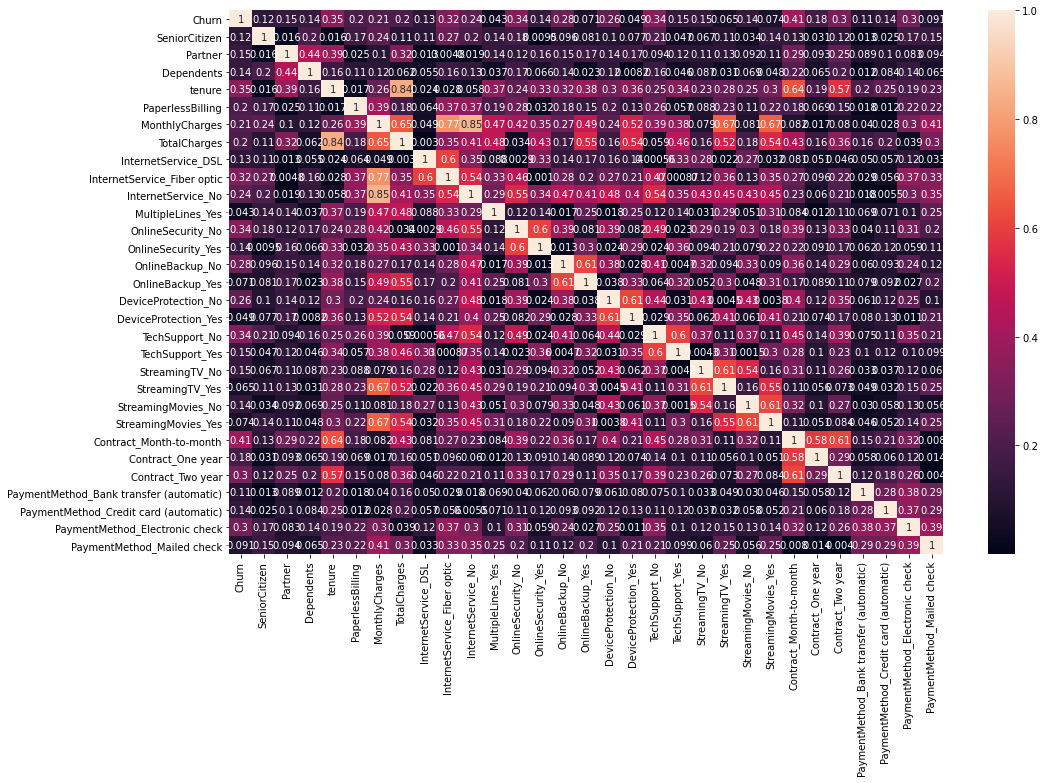

In [19]:
# Set the width and height of the figure
plt.figure(figsize=(16,10))
sns.heatmap(data=train.corr().abs(), annot=True)

In [20]:
# Try to find features that are not related to the target 'Churn'
abs(train.corr()['Churn']).sort_values()[:-1]

MultipleLines_Yes                          0.042988
DeviceProtection_Yes                       0.048851
StreamingTV_Yes                            0.064651
OnlineBackup_Yes                           0.071404
StreamingMovies_Yes                        0.073800
PaymentMethod_Mailed check                 0.091384
PaymentMethod_Bank transfer (automatic)    0.109221
SeniorCitizen                              0.123725
InternetService_DSL                        0.128352
PaymentMethod_Credit card (automatic)      0.136339
StreamingMovies_No                         0.140763
Dependents                                 0.141493
OnlineSecurity_Yes                         0.142554
TechSupport_Yes                            0.145796
StreamingTV_No                             0.149966
Partner                                    0.151983
Contract_One year                          0.184045
PaperlessBilling                           0.200383
TotalCharges                               0.201494
MonthlyCharg

In [21]:
# Define maxcorr() that try to find the attribute that have corr()>=minimum_corr with the maximum number of other attributes,
# so that attributes could be dropped, because their "information" is carried by that attribute.
def maxcorr(train, listcolumn, minimum_corr):
    listcolumn = train.columns
    listsum=[]
    for i in listcolumn:
        sum=0.0
        exclude=[]
        for j in listcolumn:
            # do not take into consideration the same attribute as i (nor target 'Churn')
            if ((i!=j) & (j!='Churn') & (abs(train[i].corr(train[j]))>=minimum_corr)):
                sum += abs(train[i].corr(train[j]))
                exclude.append(j)
        if (sum>0.0):
            listsum.append([sum, i, exclude])
    if len(listsum)>0:
        listsum.sort(reverse=True)
        for s in listsum:
            print(len(s[2]),":",s[0], "sum of corr() of ", s[1])
            print(s[2])
        return listsum[0][2]
    else:
        print("Not found")
        return []

In [22]:
coldrop = maxcorr(train, train.columns, 0.68)

2 : 1.624697324896312 sum of corr() of  MonthlyCharges
['InternetService_Fiber optic', 'InternetService_No']
1 : 0.8526134027281653 sum of corr() of  InternetService_No
['MonthlyCharges']
1 : 0.8369274694909045 sum of corr() of  tenure
['TotalCharges']
1 : 0.8369274694909045 sum of corr() of  TotalCharges
['tenure']
1 : 0.7720839221681465 sum of corr() of  InternetService_Fiber optic
['MonthlyCharges']


## I choose to delete feature that have a (weak) correlation<0.16 with 'Churn'

In [23]:
def t007(train):
    train = train.drop(['MultipleLines_Yes',
    'DeviceProtection_Yes',
    'StreamingTV_Yes',
    'OnlineBackup_Yes',
    'StreamingMovies_Yes',
#    'PaymentMethod_Mailed check',
#    'PaymentMethod_Bank transfer (automatic)',
#    'SeniorCitizen',
#    'InternetService_DSL',
#    'PaymentMethod_Credit card (automatic)',
#    'StreamingMovies_No',
#    'Dependents',
#    'OnlineSecurity_Yes',
#    'TechSupport_Yes',
#    'StreamingTV_No',
#    'Partner'
    ], axis=1)

    # Delete feature 'TotalCharges' because is highly correlated to 'tenure', but last is better correlated to 'Churn'
    train = train.drop(['TotalCharges'], axis=1)    
    return train

train = t007(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3773
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    3402 non-null   int64  
 1   SeniorCitizen                            3402 non-null   int32  
 2   Partner                                  3402 non-null   int64  
 3   Dependents                               3402 non-null   int64  
 4   tenure                                   3402 non-null   int32  
 5   PaperlessBilling                         3402 non-null   int64  
 6   MonthlyCharges                           3402 non-null   float64
 7   InternetService_DSL                      3402 non-null   uint8  
 8   InternetService_Fiber optic              3402 non-null   uint8  
 9   InternetService_No                       3402 non-null   uint8  
 10  OnlineSecurity_No                        3402 no

<AxesSubplot:>

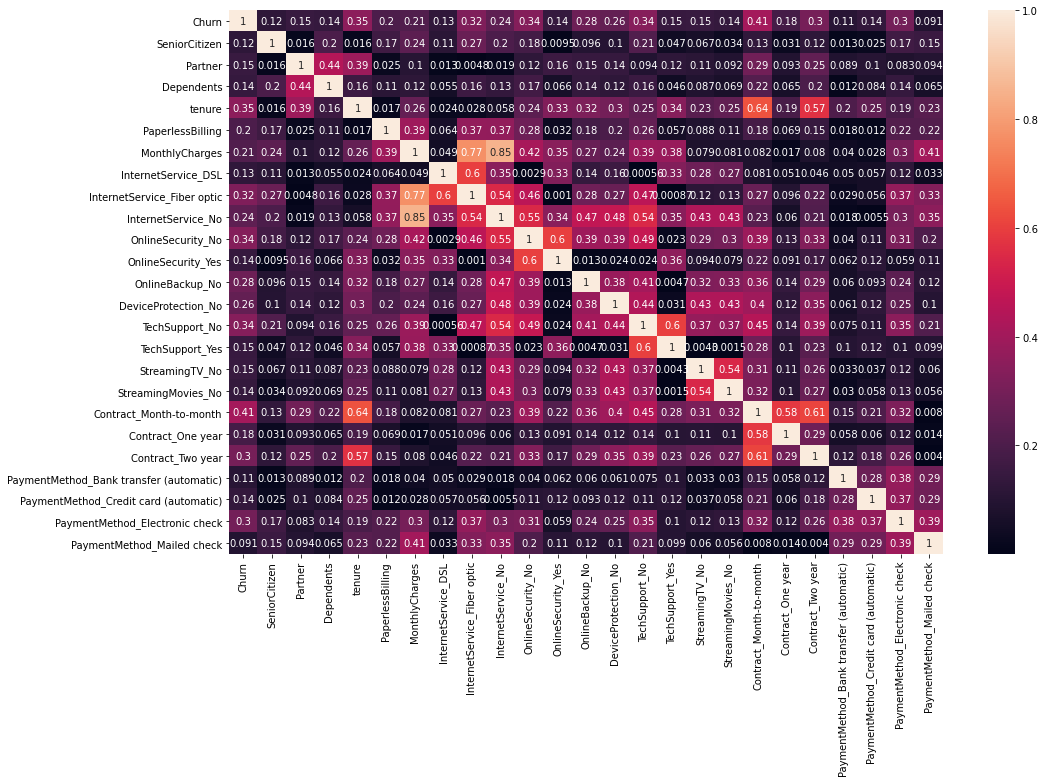

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(16,10))
sns.heatmap(data=train.corr().abs(), annot=True)

<Figure size 1152x720 with 0 Axes>

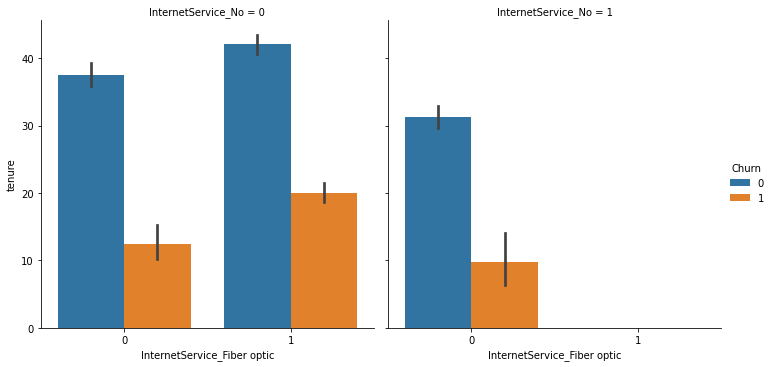

In [25]:
plt.figure(figsize=(16,10))
sns.catplot(y="tenure", x="InternetService_Fiber optic", col="InternetService_No", hue="Churn", data=train, kind="bar")

In [26]:
maxcorr(train, train.columns, 0.5)

4 : 2.486671343232235 sum of corr() of  InternetService_No
['MonthlyCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No']
3 : 1.914874595763938 sum of corr() of  InternetService_Fiber optic
['MonthlyCharges', 'InternetService_DSL', 'InternetService_No']
3 : 1.8306898636522106 sum of corr() of  Contract_Month-to-month
['tenure', 'Contract_One year', 'Contract_Two year']
2 : 1.624697324896312 sum of corr() of  MonthlyCharges
['InternetService_Fiber optic', 'InternetService_No']
2 : 1.2038717685173623 sum of corr() of  tenure
['Contract_Month-to-month', 'Contract_Two year']
2 : 1.1771826550025928 sum of corr() of  Contract_Two year
['tenure', 'Contract_Month-to-month']
2 : 1.1441807270383624 sum of corr() of  OnlineSecurity_No
['InternetService_No', 'OnlineSecurity_Yes']
2 : 1.143022632449028 sum of corr() of  TechSupport_No
['InternetService_No', 'TechSupport_Yes']
1 : 0.5988526283294722 sum of corr() of  InternetService_DSL
['InternetService_Fiber optic']
1 : 0

['MonthlyCharges',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No']

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 3773
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    3402 non-null   int64  
 1   SeniorCitizen                            3402 non-null   int32  
 2   Partner                                  3402 non-null   int64  
 3   Dependents                               3402 non-null   int64  
 4   tenure                                   3402 non-null   int32  
 5   PaperlessBilling                         3402 non-null   int64  
 6   MonthlyCharges                           3402 non-null   float64
 7   InternetService_DSL                      3402 non-null   uint8  
 8   InternetService_Fiber optic              3402 non-null   uint8  
 9   InternetService_No                       3402 non-null   uint8  
 10  OnlineSecurity_No                        3402 no

## Define a function to convert a column of the dataset into number and then normalize the column

In [28]:
def convert_normalize(df, column):
    dfc = df[column].astype(float)
    # Then normalize the column, subtracting mean and then dividing by std
    # convert to 0 all NaN (in case of some divide by zero...)
    df[column] = ((dfc-dfc.mean(axis=0))/dfc.std(axis=0)).fillna(0)

In [29]:
def convert_normalize_dataset(df):
    convert_normalize(df, "MonthlyCharges")
    convert_normalize(df, "tenure")

In [30]:
def transform_accordingly(test):
    test = t001(test)
    test = t002(test)
    test = t003(test)
    test = t004(test)
    test = t005(test)
    test = t006(test)
    test = t007(test)
    return test

In [31]:
convert_normalize_dataset(train)

### Load dataset from test file transform and normalize

In [32]:
# Open the test file for reading...
test = pd.read_csv('test.csv')

In [33]:
test = transform_accordingly(test)
convert_normalize_dataset(test)

Check for missing values: in case (simply) delete the corresponding rows...
0 <= Churn
0 <= customerID
0 <= gender
0 <= SeniorCitizen
0 <= Partner
0 <= Dependents
0 <= tenure
0 <= PhoneService
0 <= MultipleLines
0 <= InternetService
0 <= OnlineSecurity
0 <= OnlineBackup
0 <= DeviceProtection
0 <= TechSupport
0 <= StreamingTV
0 <= StreamingMovies
0 <= Contract
0 <= PaperlessBilling
0 <= PaymentMethod
0 <= MonthlyCharges
0 <= TotalCharges
Check for empty or blank strings: in case (simply) delete the corresponding rows...
0 <= Churn
0 <= customerID
0 <= gender
0 <= Partner
0 <= Dependents
0 <= PhoneService
0 <= MultipleLines
0 <= InternetService
0 <= OnlineSecurity
0 <= OnlineBackup
0 <= DeviceProtection
0 <= TechSupport
0 <= StreamingTV
0 <= StreamingMovies
0 <= Contract
0 <= PaperlessBilling
0 <= PaymentMethod
2 <= TotalCharges


### Create X and y train data

In [34]:
y_train = train['Churn'].to_numpy()

In [35]:
X_train = train.drop('Churn', axis=1).to_numpy()

### Create X and y test data

In [36]:
y_test = test['Churn'].to_numpy()
X_test = test.drop('Churn', axis=1).to_numpy()

Epoch 1/5000
107/107 [==============================] - 0s 436us/step - loss: 0.2157 - accuracy: 0.7273
Epoch 2/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1784 - accuracy: 0.7572
Epoch 3/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1591 - accuracy: 0.7715
Epoch 4/5000
107/107 [==============================] - 0s 418us/step - loss: 0.1634 - accuracy: 0.7736
Epoch 5/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1476 - accuracy: 0.7894
Epoch 6/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1511 - accuracy: 0.7778
Epoch 7/5000
107/107 [==============================] - 0s 419us/step - loss: 0.1525 - accuracy: 0.7847
Epoch 8/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1451 - accuracy: 0.7786
Epoch 9/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1421 - accuracy: 0.7864
Epoch 10/5000
107/107 [==============================] - 0s 415u

107/107 [==============================] - 0s 399us/step - loss: 0.1430 - accuracy: 0.7929
Epoch 80/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1445 - accuracy: 0.7928
Epoch 81/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1357 - accuracy: 0.8040
Epoch 82/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1408 - accuracy: 0.7979
Epoch 83/5000
107/107 [==============================] - 0s 389us/step - loss: 0.1388 - accuracy: 0.8060
Epoch 84/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1361 - accuracy: 0.8046
Epoch 85/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1435 - accuracy: 0.7900
Epoch 86/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1428 - accuracy: 0.7957
Epoch 87/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1420 - accuracy: 0.7879
Epoch 88/5000
107/107 [==============================] - 0s 399us/ste

107/107 [==============================] - 0s 399us/step - loss: 0.1385 - accuracy: 0.7948
Epoch 157/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1424 - accuracy: 0.7906
Epoch 158/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1380 - accuracy: 0.8013
Epoch 159/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1414 - accuracy: 0.7995
Epoch 160/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1350 - accuracy: 0.7983
Epoch 161/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1421 - accuracy: 0.8038
Epoch 162/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1404 - accuracy: 0.7975
Epoch 163/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1413 - accuracy: 0.7959
Epoch 164/5000
107/107 [==============================] - 0s 407us/step - loss: 0.1406 - accuracy: 0.7959
Epoch 165/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 399us/step - loss: 0.1338 - accuracy: 0.8012
Epoch 234/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1352 - accuracy: 0.8013
Epoch 235/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1371 - accuracy: 0.7967
Epoch 236/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1370 - accuracy: 0.7997
Epoch 237/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1377 - accuracy: 0.8084
Epoch 238/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1378 - accuracy: 0.8032
Epoch 239/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1439 - accuracy: 0.7900
Epoch 240/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1333 - accuracy: 0.8030
Epoch 241/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1375 - accuracy: 0.8023
Epoch 242/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 420us/step - loss: 0.1365 - accuracy: 0.8089
Epoch 311/5000
107/107 [==============================] - 0s 418us/step - loss: 0.1403 - accuracy: 0.7968
Epoch 312/5000
107/107 [==============================] - 0s 427us/step - loss: 0.1424 - accuracy: 0.7943
Epoch 313/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1360 - accuracy: 0.8074
Epoch 314/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1419 - accuracy: 0.7968
Epoch 315/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1349 - accuracy: 0.8091
Epoch 316/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1373 - accuracy: 0.8010
Epoch 317/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1432 - accuracy: 0.7899
Epoch 318/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1348 - accuracy: 0.8083
Epoch 319/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 406us/step - loss: 0.1346 - accuracy: 0.8026
Epoch 388/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1307 - accuracy: 0.8126
Epoch 389/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1420 - accuracy: 0.7933
Epoch 390/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1290 - accuracy: 0.8107
Epoch 391/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1389 - accuracy: 0.7925
Epoch 392/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1357 - accuracy: 0.8107
Epoch 393/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1339 - accuracy: 0.8075
Epoch 394/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1373 - accuracy: 0.8071
Epoch 395/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1349 - accuracy: 0.7998
Epoch 396/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 396us/step - loss: 0.1344 - accuracy: 0.8075
Epoch 465/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1346 - accuracy: 0.7971
Epoch 466/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1374 - accuracy: 0.8017
Epoch 467/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1385 - accuracy: 0.7990
Epoch 468/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1399 - accuracy: 0.8009
Epoch 469/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1360 - accuracy: 0.8023
Epoch 470/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1394 - accuracy: 0.7960
Epoch 471/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1323 - accuracy: 0.8118
Epoch 472/5000
107/107 [==============================] - 0s 419us/step - loss: 0.1392 - accuracy: 0.7965
Epoch 473/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 396us/step - loss: 0.1307 - accuracy: 0.8145
Epoch 542/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1368 - accuracy: 0.8066
Epoch 543/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1338 - accuracy: 0.7976
Epoch 544/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1412 - accuracy: 0.7921
Epoch 545/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1255 - accuracy: 0.8170
Epoch 546/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1406 - accuracy: 0.8044
Epoch 547/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1352 - accuracy: 0.7970
Epoch 548/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1346 - accuracy: 0.8033
Epoch 549/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1335 - accuracy: 0.8168
Epoch 550/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 396us/step - loss: 0.1414 - accuracy: 0.7921
Epoch 619/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1317 - accuracy: 0.8075
Epoch 620/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1400 - accuracy: 0.7947
Epoch 621/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1370 - accuracy: 0.7941
Epoch 622/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1364 - accuracy: 0.8034
Epoch 623/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1388 - accuracy: 0.7923
Epoch 624/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1446 - accuracy: 0.7944
Epoch 625/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1337 - accuracy: 0.8010
Epoch 626/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1344 - accuracy: 0.8026
Epoch 627/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 391us/step - loss: 0.1319 - accuracy: 0.8204
Epoch 696/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1355 - accuracy: 0.8082
Epoch 697/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1352 - accuracy: 0.8036
Epoch 698/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1330 - accuracy: 0.8072
Epoch 699/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1336 - accuracy: 0.8085
Epoch 700/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1364 - accuracy: 0.8047
Epoch 701/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1369 - accuracy: 0.7934
Epoch 702/5000
107/107 [==============================] - 0s 386us/step - loss: 0.1352 - accuracy: 0.8073
Epoch 703/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1373 - accuracy: 0.7966
Epoch 704/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 399us/step - loss: 0.1302 - accuracy: 0.8145
Epoch 773/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1385 - accuracy: 0.7975
Epoch 774/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1255 - accuracy: 0.8268
Epoch 775/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1326 - accuracy: 0.8002
Epoch 776/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1303 - accuracy: 0.8128
Epoch 777/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1343 - accuracy: 0.8049
Epoch 778/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1362 - accuracy: 0.7994
Epoch 779/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1282 - accuracy: 0.8150
Epoch 780/5000
107/107 [==============================] - 0s 386us/step - loss: 0.1300 - accuracy: 0.8085
Epoch 781/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 399us/step - loss: 0.1311 - accuracy: 0.8103
Epoch 850/5000
107/107 [==============================] - 0s 411us/step - loss: 0.1379 - accuracy: 0.7948
Epoch 851/5000
107/107 [==============================] - 0s 391us/step - loss: 0.1283 - accuracy: 0.8072
Epoch 852/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1278 - accuracy: 0.8191
Epoch 853/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1273 - accuracy: 0.8164
Epoch 854/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1298 - accuracy: 0.8068
Epoch 855/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1389 - accuracy: 0.8079
Epoch 856/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1325 - accuracy: 0.8042
Epoch 857/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1277 - accuracy: 0.8165
Epoch 858/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 392us/step - loss: 0.1368 - accuracy: 0.8045
Epoch 927/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1336 - accuracy: 0.8057
Epoch 928/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1309 - accuracy: 0.8093
Epoch 929/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1332 - accuracy: 0.8102
Epoch 930/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1306 - accuracy: 0.8024
Epoch 931/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1366 - accuracy: 0.8071
Epoch 932/5000
107/107 [==============================] - 0s 391us/step - loss: 0.1307 - accuracy: 0.8125
Epoch 933/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1250 - accuracy: 0.8213
Epoch 934/5000
107/107 [==============================] - 0s 392us/step - loss: 0.1396 - accuracy: 0.8008
Epoch 935/5000
107/107 [==============================] - 0s 

107/107 [==============================] - 0s 410us/step - loss: 0.1263 - accuracy: 0.8233
Epoch 1004/5000
107/107 [==============================] - 0s 413us/step - loss: 0.1322 - accuracy: 0.8146
Epoch 1005/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1355 - accuracy: 0.8056
Epoch 1006/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1387 - accuracy: 0.8032
Epoch 1007/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1312 - accuracy: 0.8087
Epoch 1008/5000
107/107 [==============================] - 0s 418us/step - loss: 0.1396 - accuracy: 0.7966
Epoch 1009/5000
107/107 [==============================] - 0s 414us/step - loss: 0.1345 - accuracy: 0.8061
Epoch 1010/5000
107/107 [==============================] - 0s 419us/step - loss: 0.1318 - accuracy: 0.8086
Epoch 1011/5000
107/107 [==============================] - 0s 411us/step - loss: 0.1340 - accuracy: 0.8069
Epoch 1012/5000
107/107 [============================

107/107 [==============================] - 0s 401us/step - loss: 0.1330 - accuracy: 0.8068
Epoch 1080/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1355 - accuracy: 0.8036
Epoch 1081/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1385 - accuracy: 0.7955
Epoch 1082/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1316 - accuracy: 0.8021
Epoch 1083/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1334 - accuracy: 0.8068
Epoch 1084/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1306 - accuracy: 0.8162
Epoch 1085/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1352 - accuracy: 0.8118
Epoch 1086/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1296 - accuracy: 0.8099
Epoch 1087/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1308 - accuracy: 0.8084
Epoch 1088/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1318 - accuracy: 0.8096
Epoch 1156/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1319 - accuracy: 0.8064
Epoch 1157/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1356 - accuracy: 0.8052
Epoch 1158/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1328 - accuracy: 0.8041
Epoch 1159/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1318 - accuracy: 0.8059
Epoch 1160/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1324 - accuracy: 0.8101
Epoch 1161/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1332 - accuracy: 0.8062
Epoch 1162/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1354 - accuracy: 0.8020
Epoch 1163/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1349 - accuracy: 0.8080
Epoch 1164/5000
107/107 [============================

107/107 [==============================] - 0s 390us/step - loss: 0.1351 - accuracy: 0.8025
Epoch 1232/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1317 - accuracy: 0.8156
Epoch 1233/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1307 - accuracy: 0.8197
Epoch 1234/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1315 - accuracy: 0.8073
Epoch 1235/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1315 - accuracy: 0.8109
Epoch 1236/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1375 - accuracy: 0.7960
Epoch 1237/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1349 - accuracy: 0.7981
Epoch 1238/5000
107/107 [==============================] - 0s 418us/step - loss: 0.1360 - accuracy: 0.8078
Epoch 1239/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1305 - accuracy: 0.8165
Epoch 1240/5000
107/107 [============================

107/107 [==============================] - 0s 400us/step - loss: 0.1300 - accuracy: 0.8251
Epoch 1308/5000
107/107 [==============================] - 0s 432us/step - loss: 0.1363 - accuracy: 0.8036
Epoch 1309/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1330 - accuracy: 0.8117
Epoch 1310/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1337 - accuracy: 0.8037
Epoch 1311/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1326 - accuracy: 0.8049
Epoch 1312/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1364 - accuracy: 0.8043
Epoch 1313/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1296 - accuracy: 0.8073
Epoch 1314/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1374 - accuracy: 0.7999
Epoch 1315/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1309 - accuracy: 0.8167
Epoch 1316/5000
107/107 [============================

107/107 [==============================] - 0s 418us/step - loss: 0.1220 - accuracy: 0.8336
Epoch 1384/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1290 - accuracy: 0.8170
Epoch 1385/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1332 - accuracy: 0.8119
Epoch 1386/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1326 - accuracy: 0.8129
Epoch 1387/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1330 - accuracy: 0.8055
Epoch 1388/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1265 - accuracy: 0.8184
Epoch 1389/5000
107/107 [==============================] - 0s 423us/step - loss: 0.1312 - accuracy: 0.8074
Epoch 1390/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1292 - accuracy: 0.8144
Epoch 1391/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1363 - accuracy: 0.8025
Epoch 1392/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1306 - accuracy: 0.8010
Epoch 1460/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1389 - accuracy: 0.7989
Epoch 1461/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1401 - accuracy: 0.7978
Epoch 1462/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1356 - accuracy: 0.8079
Epoch 1463/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1323 - accuracy: 0.8079
Epoch 1464/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1312 - accuracy: 0.8194
Epoch 1465/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1341 - accuracy: 0.8112
Epoch 1466/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1272 - accuracy: 0.8227
Epoch 1467/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1337 - accuracy: 0.8108
Epoch 1468/5000
107/107 [============================

107/107 [==============================] - 0s 437us/step - loss: 0.1364 - accuracy: 0.7978
Epoch 1536/5000
107/107 [==============================] - 0s 433us/step - loss: 0.1318 - accuracy: 0.8133
Epoch 1537/5000
107/107 [==============================] - 0s 453us/step - loss: 0.1250 - accuracy: 0.8193
Epoch 1538/5000
107/107 [==============================] - 0s 453us/step - loss: 0.1333 - accuracy: 0.8118
Epoch 1539/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1310 - accuracy: 0.8096
Epoch 1540/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1323 - accuracy: 0.8104
Epoch 1541/5000
107/107 [==============================] - 0s 435us/step - loss: 0.1324 - accuracy: 0.8070
Epoch 1542/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1366 - accuracy: 0.8059
Epoch 1543/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1353 - accuracy: 0.8013
Epoch 1544/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1329 - accuracy: 0.8074
Epoch 1611/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1309 - accuracy: 0.8102
Epoch 1612/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1346 - accuracy: 0.8081
Epoch 1613/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1313 - accuracy: 0.8123
Epoch 1614/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1327 - accuracy: 0.8073
Epoch 1615/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1341 - accuracy: 0.8053
Epoch 1616/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1304 - accuracy: 0.8124
Epoch 1617/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1266 - accuracy: 0.8223
Epoch 1618/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1356 - accuracy: 0.8009
Epoch 1619/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1280 - accuracy: 0.8195
Epoch 1687/5000
107/107 [==============================] - 0s 411us/step - loss: 0.1217 - accuracy: 0.8166
Epoch 1688/5000
107/107 [==============================] - 0s 410us/step - loss: 0.1334 - accuracy: 0.8092
Epoch 1689/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1336 - accuracy: 0.8073
Epoch 1690/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1277 - accuracy: 0.8222
Epoch 1691/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1320 - accuracy: 0.8116
Epoch 1692/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1315 - accuracy: 0.8133
Epoch 1693/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1386 - accuracy: 0.7990
Epoch 1694/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1304 - accuracy: 0.8117
Epoch 1695/5000
107/107 [============================

107/107 [==============================] - 0s 413us/step - loss: 0.1287 - accuracy: 0.8133
Epoch 1763/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1313 - accuracy: 0.8083
Epoch 1764/5000
107/107 [==============================] - 0s 385us/step - loss: 0.1309 - accuracy: 0.8094
Epoch 1765/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1256 - accuracy: 0.8181
Epoch 1766/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1327 - accuracy: 0.8074
Epoch 1767/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1368 - accuracy: 0.8069
Epoch 1768/5000
107/107 [==============================] - 0s 380us/step - loss: 0.1301 - accuracy: 0.8113
Epoch 1769/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1296 - accuracy: 0.8053
Epoch 1770/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1304 - accuracy: 0.8090
Epoch 1771/5000
107/107 [============================

107/107 [==============================] - 0s 385us/step - loss: 0.1302 - accuracy: 0.8086
Epoch 1839/5000
107/107 [==============================] - 0s 385us/step - loss: 0.1306 - accuracy: 0.8063
Epoch 1840/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1305 - accuracy: 0.8142
Epoch 1841/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1342 - accuracy: 0.8049
Epoch 1842/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1303 - accuracy: 0.8151
Epoch 1843/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1286 - accuracy: 0.8139
Epoch 1844/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1294 - accuracy: 0.8131
Epoch 1845/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1304 - accuracy: 0.8129
Epoch 1846/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1323 - accuracy: 0.8117
Epoch 1847/5000
107/107 [============================

107/107 [==============================] - 0s 462us/step - loss: 0.1275 - accuracy: 0.8233
Epoch 1915/5000
107/107 [==============================] - 0s 587us/step - loss: 0.1240 - accuracy: 0.8254
Epoch 1916/5000
107/107 [==============================] - 0s 619us/step - loss: 0.1314 - accuracy: 0.8199
Epoch 1917/5000
107/107 [==============================] - 0s 549us/step - loss: 0.1353 - accuracy: 0.8063
Epoch 1918/5000
107/107 [==============================] - 0s 462us/step - loss: 0.1320 - accuracy: 0.8161
Epoch 1919/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1281 - accuracy: 0.8136
Epoch 1920/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1297 - accuracy: 0.8159
Epoch 1921/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1357 - accuracy: 0.8038
Epoch 1922/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1359 - accuracy: 0.8100
Epoch 1923/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1412 - accuracy: 0.7958
Epoch 1991/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1294 - accuracy: 0.8090
Epoch 1992/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1283 - accuracy: 0.8168
Epoch 1993/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1304 - accuracy: 0.8115
Epoch 1994/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1296 - accuracy: 0.8164
Epoch 1995/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1279 - accuracy: 0.8241
Epoch 1996/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1306 - accuracy: 0.8055
Epoch 1997/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1279 - accuracy: 0.8223
Epoch 1998/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1256 - accuracy: 0.8184
Epoch 1999/5000
107/107 [============================

107/107 [==============================] - 0s 396us/step - loss: 0.1237 - accuracy: 0.8220
Epoch 2067/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1369 - accuracy: 0.7995
Epoch 2068/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1244 - accuracy: 0.8203
Epoch 2069/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1276 - accuracy: 0.8242
Epoch 2070/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1246 - accuracy: 0.8241
Epoch 2071/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1327 - accuracy: 0.8163
Epoch 2072/5000
107/107 [==============================] - 0s 386us/step - loss: 0.1250 - accuracy: 0.8239
Epoch 2073/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1306 - accuracy: 0.8140
Epoch 2074/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1337 - accuracy: 0.8037
Epoch 2075/5000
107/107 [============================

107/107 [==============================] - 0s 462us/step - loss: 0.1306 - accuracy: 0.8147
Epoch 2143/5000
107/107 [==============================] - 0s 447us/step - loss: 0.1269 - accuracy: 0.8234
Epoch 2144/5000
107/107 [==============================] - 0s 491us/step - loss: 0.1265 - accuracy: 0.8238
Epoch 2145/5000
107/107 [==============================] - 0s 472us/step - loss: 0.1260 - accuracy: 0.8322
Epoch 2146/5000
107/107 [==============================] - 0s 481us/step - loss: 0.1293 - accuracy: 0.8056
Epoch 2147/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1326 - accuracy: 0.8101
Epoch 2148/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1340 - accuracy: 0.8135
Epoch 2149/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1325 - accuracy: 0.8076
Epoch 2150/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1234 - accuracy: 0.8235
Epoch 2151/5000
107/107 [============================

107/107 [==============================] - 0s 390us/step - loss: 0.1361 - accuracy: 0.8016
Epoch 2219/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1254 - accuracy: 0.8259
Epoch 2220/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1326 - accuracy: 0.8073
Epoch 2221/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1366 - accuracy: 0.8029
Epoch 2222/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1292 - accuracy: 0.8098
Epoch 2223/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1289 - accuracy: 0.8291
Epoch 2224/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1312 - accuracy: 0.8139
Epoch 2225/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1327 - accuracy: 0.8084
Epoch 2226/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1272 - accuracy: 0.8149
Epoch 2227/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1258 - accuracy: 0.8252
Epoch 2295/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1256 - accuracy: 0.8228
Epoch 2296/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1335 - accuracy: 0.8156
Epoch 2297/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1322 - accuracy: 0.8066
Epoch 2298/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1246 - accuracy: 0.8221
Epoch 2299/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1308 - accuracy: 0.8087
Epoch 2300/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1390 - accuracy: 0.8015
Epoch 2301/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1309 - accuracy: 0.8113
Epoch 2302/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1277 - accuracy: 0.8217
Epoch 2303/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1324 - accuracy: 0.8156
Epoch 2371/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1286 - accuracy: 0.8207
Epoch 2372/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1262 - accuracy: 0.8140
Epoch 2373/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1343 - accuracy: 0.8071
Epoch 2374/5000
107/107 [==============================] - 0s 429us/step - loss: 0.1304 - accuracy: 0.8217
Epoch 2375/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1283 - accuracy: 0.8157
Epoch 2376/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1280 - accuracy: 0.8229
Epoch 2377/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1255 - accuracy: 0.8252
Epoch 2378/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1279 - accuracy: 0.8200
Epoch 2379/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1305 - accuracy: 0.8096
Epoch 2447/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1331 - accuracy: 0.8100
Epoch 2448/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1249 - accuracy: 0.8205
Epoch 2449/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1328 - accuracy: 0.8160
Epoch 2450/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1274 - accuracy: 0.8064
Epoch 2451/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1231 - accuracy: 0.8257
Epoch 2452/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1284 - accuracy: 0.8174
Epoch 2453/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1261 - accuracy: 0.8225
Epoch 2454/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1225 - accuracy: 0.8270
Epoch 2455/5000
107/107 [============================

107/107 [==============================] - 0s 390us/step - loss: 0.1250 - accuracy: 0.8213
Epoch 2523/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1257 - accuracy: 0.8252
Epoch 2524/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1277 - accuracy: 0.8188
Epoch 2525/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1245 - accuracy: 0.8208
Epoch 2526/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1337 - accuracy: 0.8137
Epoch 2527/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1274 - accuracy: 0.8243
Epoch 2528/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1301 - accuracy: 0.8138
Epoch 2529/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1191 - accuracy: 0.8311
Epoch 2530/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1310 - accuracy: 0.8082
Epoch 2531/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1299 - accuracy: 0.8183
Epoch 2599/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1306 - accuracy: 0.8090
Epoch 2600/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1322 - accuracy: 0.8073
Epoch 2601/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1301 - accuracy: 0.8101
Epoch 2602/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1282 - accuracy: 0.8149
Epoch 2603/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1237 - accuracy: 0.8253
Epoch 2604/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1257 - accuracy: 0.8190
Epoch 2605/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1314 - accuracy: 0.8055
Epoch 2606/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1256 - accuracy: 0.8203
Epoch 2607/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1282 - accuracy: 0.8119
Epoch 2675/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1267 - accuracy: 0.8173
Epoch 2676/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1252 - accuracy: 0.8204
Epoch 2677/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1216 - accuracy: 0.8299
Epoch 2678/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1238 - accuracy: 0.8265
Epoch 2679/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1236 - accuracy: 0.8151
Epoch 2680/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1310 - accuracy: 0.8044
Epoch 2681/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1222 - accuracy: 0.8277
Epoch 2682/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1284 - accuracy: 0.8198
Epoch 2683/5000
107/107 [============================

107/107 [==============================] - 0s 418us/step - loss: 0.1262 - accuracy: 0.8220
Epoch 2751/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1255 - accuracy: 0.8219
Epoch 2752/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1315 - accuracy: 0.8137
Epoch 2753/5000
107/107 [==============================] - 0s 386us/step - loss: 0.1265 - accuracy: 0.8211
Epoch 2754/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1248 - accuracy: 0.8101
Epoch 2755/5000
107/107 [==============================] - 0s 402us/step - loss: 0.1320 - accuracy: 0.8148
Epoch 2756/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1222 - accuracy: 0.8207
Epoch 2757/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1277 - accuracy: 0.8099
Epoch 2758/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1252 - accuracy: 0.8197
Epoch 2759/5000
107/107 [============================

107/107 [==============================] - 0s 415us/step - loss: 0.1268 - accuracy: 0.8224
Epoch 2827/5000
107/107 [==============================] - 0s 462us/step - loss: 0.1252 - accuracy: 0.8256
Epoch 2828/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1245 - accuracy: 0.8266
Epoch 2829/5000
107/107 [==============================] - 0s 437us/step - loss: 0.1303 - accuracy: 0.8122
Epoch 2830/5000
107/107 [==============================] - 0s 469us/step - loss: 0.1274 - accuracy: 0.8172
Epoch 2831/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1313 - accuracy: 0.8161
Epoch 2832/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1254 - accuracy: 0.8325
Epoch 2833/5000
107/107 [==============================] - 0s 443us/step - loss: 0.1300 - accuracy: 0.8130
Epoch 2834/5000
107/107 [==============================] - 0s 419us/step - loss: 0.1268 - accuracy: 0.8100
Epoch 2835/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1292 - accuracy: 0.8088
Epoch 2903/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1321 - accuracy: 0.8178
Epoch 2904/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1271 - accuracy: 0.8190
Epoch 2905/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1265 - accuracy: 0.8154
Epoch 2906/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1383 - accuracy: 0.8000
Epoch 2907/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1316 - accuracy: 0.8075
Epoch 2908/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1302 - accuracy: 0.8121
Epoch 2909/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1252 - accuracy: 0.8166
Epoch 2910/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1296 - accuracy: 0.8134
Epoch 2911/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1331 - accuracy: 0.8132
Epoch 2979/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1250 - accuracy: 0.8287
Epoch 2980/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1281 - accuracy: 0.8170
Epoch 2981/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1255 - accuracy: 0.8182
Epoch 2982/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1333 - accuracy: 0.8069
Epoch 2983/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1237 - accuracy: 0.8280
Epoch 2984/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1250 - accuracy: 0.8249
Epoch 2985/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1273 - accuracy: 0.8163
Epoch 2986/5000
107/107 [==============================] - 0s 418us/step - loss: 0.1287 - accuracy: 0.8153
Epoch 2987/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1291 - accuracy: 0.8160
Epoch 3055/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1310 - accuracy: 0.8197
Epoch 3056/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1324 - accuracy: 0.8113
Epoch 3057/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1318 - accuracy: 0.8038
Epoch 3058/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1263 - accuracy: 0.8202
Epoch 3059/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1252 - accuracy: 0.8146
Epoch 3060/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1262 - accuracy: 0.8166
Epoch 3061/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1343 - accuracy: 0.8020
Epoch 3062/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1234 - accuracy: 0.8325
Epoch 3063/5000
107/107 [============================

107/107 [==============================] - 0s 415us/step - loss: 0.1276 - accuracy: 0.8132
Epoch 3131/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1242 - accuracy: 0.8231
Epoch 3132/5000
107/107 [==============================] - 0s 453us/step - loss: 0.1342 - accuracy: 0.8037
Epoch 3133/5000
107/107 [==============================] - 0s 424us/step - loss: 0.1323 - accuracy: 0.8107
Epoch 3134/5000
107/107 [==============================] - 0s 481us/step - loss: 0.1205 - accuracy: 0.8232
Epoch 3135/5000
107/107 [==============================] - 0s 416us/step - loss: 0.1257 - accuracy: 0.8206
Epoch 3136/5000
107/107 [==============================] - 0s 438us/step - loss: 0.1218 - accuracy: 0.8222
Epoch 3137/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1248 - accuracy: 0.8344
Epoch 3138/5000
107/107 [==============================] - 0s 444us/step - loss: 0.1296 - accuracy: 0.8091
Epoch 3139/5000
107/107 [============================

107/107 [==============================] - 0s 396us/step - loss: 0.1275 - accuracy: 0.8141
Epoch 3207/5000
107/107 [==============================] - 0s 428us/step - loss: 0.1221 - accuracy: 0.8228
Epoch 3208/5000
107/107 [==============================] - 0s 427us/step - loss: 0.1244 - accuracy: 0.8281
Epoch 3209/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1249 - accuracy: 0.8239
Epoch 3210/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1276 - accuracy: 0.8168
Epoch 3211/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1293 - accuracy: 0.8171
Epoch 3212/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1283 - accuracy: 0.8115
Epoch 3213/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1221 - accuracy: 0.8178
Epoch 3214/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1311 - accuracy: 0.8100
Epoch 3215/5000
107/107 [============================

107/107 [==============================] - 0s 390us/step - loss: 0.1317 - accuracy: 0.8053
Epoch 3283/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1334 - accuracy: 0.8024
Epoch 3284/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1279 - accuracy: 0.8205
Epoch 3285/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1297 - accuracy: 0.8210
Epoch 3286/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1230 - accuracy: 0.8304
Epoch 3287/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1245 - accuracy: 0.8153
Epoch 3288/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1224 - accuracy: 0.8280
Epoch 3289/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1354 - accuracy: 0.8034
Epoch 3290/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1277 - accuracy: 0.8180
Epoch 3291/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1197 - accuracy: 0.8282
Epoch 3359/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1247 - accuracy: 0.8223
Epoch 3360/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1226 - accuracy: 0.8316
Epoch 3361/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1255 - accuracy: 0.8165
Epoch 3362/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1218 - accuracy: 0.8285
Epoch 3363/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1335 - accuracy: 0.8051
Epoch 3364/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1238 - accuracy: 0.8241
Epoch 3365/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1254 - accuracy: 0.8272
Epoch 3366/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1294 - accuracy: 0.8032
Epoch 3367/5000
107/107 [============================

107/107 [==============================] - 0s 390us/step - loss: 0.1282 - accuracy: 0.8202
Epoch 3435/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1283 - accuracy: 0.8207
Epoch 3436/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1210 - accuracy: 0.8304
Epoch 3437/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1247 - accuracy: 0.8277
Epoch 3438/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1265 - accuracy: 0.8239
Epoch 3439/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1294 - accuracy: 0.8178
Epoch 3440/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1285 - accuracy: 0.8212
Epoch 3441/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1221 - accuracy: 0.8184
Epoch 3442/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1264 - accuracy: 0.8231
Epoch 3443/5000
107/107 [============================

107/107 [==============================] - 0s 414us/step - loss: 0.1286 - accuracy: 0.8221
Epoch 3511/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1301 - accuracy: 0.8174
Epoch 3512/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1269 - accuracy: 0.8139
Epoch 3513/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1209 - accuracy: 0.8241
Epoch 3514/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1321 - accuracy: 0.8163
Epoch 3515/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1275 - accuracy: 0.8254
Epoch 3516/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1300 - accuracy: 0.8205
Epoch 3517/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1273 - accuracy: 0.8216
Epoch 3518/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1274 - accuracy: 0.8240
Epoch 3519/5000
107/107 [============================

107/107 [==============================] - 0s 390us/step - loss: 0.1268 - accuracy: 0.8151
Epoch 3587/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1242 - accuracy: 0.8170
Epoch 3588/5000
107/107 [==============================] - 0s 380us/step - loss: 0.1312 - accuracy: 0.8112
Epoch 3589/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1288 - accuracy: 0.8136
Epoch 3590/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1233 - accuracy: 0.8310
Epoch 3591/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1293 - accuracy: 0.8165
Epoch 3592/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1200 - accuracy: 0.8231
Epoch 3593/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1293 - accuracy: 0.8206
Epoch 3594/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1256 - accuracy: 0.8275
Epoch 3595/5000
107/107 [============================

107/107 [==============================] - 0s 396us/step - loss: 0.1306 - accuracy: 0.8144
Epoch 3663/5000
107/107 [==============================] - 0s 385us/step - loss: 0.1264 - accuracy: 0.8107
Epoch 3664/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1254 - accuracy: 0.8225
Epoch 3665/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1311 - accuracy: 0.8140
Epoch 3666/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1311 - accuracy: 0.8078
Epoch 3667/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1344 - accuracy: 0.8015
Epoch 3668/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1247 - accuracy: 0.8236
Epoch 3669/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1336 - accuracy: 0.8067
Epoch 3670/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1298 - accuracy: 0.8230
Epoch 3671/5000
107/107 [============================

107/107 [==============================] - 0s 415us/step - loss: 0.1253 - accuracy: 0.8216
Epoch 3739/5000
107/107 [==============================] - 0s 443us/step - loss: 0.1288 - accuracy: 0.8114
Epoch 3740/5000
107/107 [==============================] - 0s 416us/step - loss: 0.1291 - accuracy: 0.8183
Epoch 3741/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1259 - accuracy: 0.8198
Epoch 3742/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1221 - accuracy: 0.8108
Epoch 3743/5000
107/107 [==============================] - 0s 439us/step - loss: 0.1307 - accuracy: 0.8079
Epoch 3744/5000
107/107 [==============================] - 0s 439us/step - loss: 0.1221 - accuracy: 0.8216
Epoch 3745/5000
107/107 [==============================] - 0s 458us/step - loss: 0.1301 - accuracy: 0.8112
Epoch 3746/5000
107/107 [==============================] - 0s 448us/step - loss: 0.1256 - accuracy: 0.8276
Epoch 3747/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1280 - accuracy: 0.8155
Epoch 3815/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1248 - accuracy: 0.8252
Epoch 3816/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1271 - accuracy: 0.8193
Epoch 3817/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1236 - accuracy: 0.8152
Epoch 3818/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1232 - accuracy: 0.8314
Epoch 3819/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1207 - accuracy: 0.8352
Epoch 3820/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1234 - accuracy: 0.8286
Epoch 3821/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1255 - accuracy: 0.8250
Epoch 3822/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1307 - accuracy: 0.8198
Epoch 3823/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1227 - accuracy: 0.8201
Epoch 3891/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1245 - accuracy: 0.8215
Epoch 3892/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1307 - accuracy: 0.8200
Epoch 3893/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1203 - accuracy: 0.8230
Epoch 3894/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1271 - accuracy: 0.8147
Epoch 3895/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1303 - accuracy: 0.8035
Epoch 3896/5000
107/107 [==============================] - 0s 491us/step - loss: 0.1283 - accuracy: 0.8142
Epoch 3897/5000
107/107 [==============================] - 0s 481us/step - loss: 0.1293 - accuracy: 0.8126
Epoch 3898/5000
107/107 [==============================] - 0s 481us/step - loss: 0.1240 - accuracy: 0.8192
Epoch 3899/5000
107/107 [============================

107/107 [==============================] - 0s 424us/step - loss: 0.1260 - accuracy: 0.8163
Epoch 3967/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1289 - accuracy: 0.8147
Epoch 3968/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1251 - accuracy: 0.8228
Epoch 3969/5000
107/107 [==============================] - 0s 434us/step - loss: 0.1243 - accuracy: 0.8317
Epoch 3970/5000
107/107 [==============================] - 0s 443us/step - loss: 0.1218 - accuracy: 0.8218
Epoch 3971/5000
107/107 [==============================] - 0s 424us/step - loss: 0.1267 - accuracy: 0.8079
Epoch 3972/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1215 - accuracy: 0.8286
Epoch 3973/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1264 - accuracy: 0.8210
Epoch 3974/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1261 - accuracy: 0.8198
Epoch 3975/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1213 - accuracy: 0.8240
Epoch 4043/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1251 - accuracy: 0.8196
Epoch 4044/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1267 - accuracy: 0.8156
Epoch 4045/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1178 - accuracy: 0.8360
Epoch 4046/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1251 - accuracy: 0.8170
Epoch 4047/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1269 - accuracy: 0.8143
Epoch 4048/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1218 - accuracy: 0.8313
Epoch 4049/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1255 - accuracy: 0.8262
Epoch 4050/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1273 - accuracy: 0.8250
Epoch 4051/5000
107/107 [============================

107/107 [==============================] - 0s 414us/step - loss: 0.1187 - accuracy: 0.8282
Epoch 4119/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1269 - accuracy: 0.8221
Epoch 4120/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1269 - accuracy: 0.8207
Epoch 4121/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1259 - accuracy: 0.8187
Epoch 4122/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1265 - accuracy: 0.8230
Epoch 4123/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1167 - accuracy: 0.8288
Epoch 4124/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1252 - accuracy: 0.8211
Epoch 4125/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1175 - accuracy: 0.8359
Epoch 4126/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1250 - accuracy: 0.8224
Epoch 4127/5000
107/107 [============================

107/107 [==============================] - 0s 399us/step - loss: 0.1229 - accuracy: 0.8201
Epoch 4195/5000
107/107 [==============================] - 0s 435us/step - loss: 0.1241 - accuracy: 0.8114
Epoch 4196/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1319 - accuracy: 0.8076
Epoch 4197/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1240 - accuracy: 0.8300
Epoch 4198/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1225 - accuracy: 0.8342
Epoch 4199/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1194 - accuracy: 0.8355
Epoch 4200/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1304 - accuracy: 0.8150
Epoch 4201/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1263 - accuracy: 0.8205
Epoch 4202/5000
107/107 [==============================] - 0s 387us/step - loss: 0.1233 - accuracy: 0.8241
Epoch 4203/5000
107/107 [============================

107/107 [==============================] - 0s 395us/step - loss: 0.1289 - accuracy: 0.8191
Epoch 4271/5000
107/107 [==============================] - 0s 410us/step - loss: 0.1296 - accuracy: 0.8156
Epoch 4272/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1220 - accuracy: 0.8253
Epoch 4273/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1163 - accuracy: 0.8391
Epoch 4274/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1246 - accuracy: 0.8147
Epoch 4275/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1218 - accuracy: 0.8307
Epoch 4276/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1261 - accuracy: 0.8195
Epoch 4277/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1281 - accuracy: 0.8187
Epoch 4278/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1242 - accuracy: 0.8213
Epoch 4279/5000
107/107 [============================

107/107 [==============================] - 0s 395us/step - loss: 0.1246 - accuracy: 0.8194
Epoch 4347/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1208 - accuracy: 0.8316
Epoch 4348/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1250 - accuracy: 0.8200
Epoch 4349/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1273 - accuracy: 0.8191
Epoch 4350/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1207 - accuracy: 0.8294
Epoch 4351/5000
107/107 [==============================] - 0s 397us/step - loss: 0.1284 - accuracy: 0.8161
Epoch 4352/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1279 - accuracy: 0.8252
Epoch 4353/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1277 - accuracy: 0.8227
Epoch 4354/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1249 - accuracy: 0.8233
Epoch 4355/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1290 - accuracy: 0.8187
Epoch 4423/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1246 - accuracy: 0.8281
Epoch 4424/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1259 - accuracy: 0.8238
Epoch 4425/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1267 - accuracy: 0.8159
Epoch 4426/5000
107/107 [==============================] - 0s 385us/step - loss: 0.1294 - accuracy: 0.8089
Epoch 4427/5000
107/107 [==============================] - 0s 400us/step - loss: 0.1148 - accuracy: 0.8460
Epoch 4428/5000
107/107 [==============================] - 0s 391us/step - loss: 0.1272 - accuracy: 0.8135
Epoch 4429/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1213 - accuracy: 0.8288
Epoch 4430/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1225 - accuracy: 0.8329
Epoch 4431/5000
107/107 [============================

107/107 [==============================] - 0s 385us/step - loss: 0.1291 - accuracy: 0.8137
Epoch 4499/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1245 - accuracy: 0.8242
Epoch 4500/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1247 - accuracy: 0.8259
Epoch 4501/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1328 - accuracy: 0.8043
Epoch 4502/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1230 - accuracy: 0.8291
Epoch 4503/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1188 - accuracy: 0.8267
Epoch 4504/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1276 - accuracy: 0.8103
Epoch 4505/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1273 - accuracy: 0.8162
Epoch 4506/5000
107/107 [==============================] - 0s 395us/step - loss: 0.1233 - accuracy: 0.8273
Epoch 4507/5000
107/107 [============================

107/107 [==============================] - 0s 424us/step - loss: 0.1287 - accuracy: 0.8189
Epoch 4575/5000
107/107 [==============================] - 0s 394us/step - loss: 0.1186 - accuracy: 0.8323
Epoch 4576/5000
107/107 [==============================] - 0s 432us/step - loss: 0.1238 - accuracy: 0.8269
Epoch 4577/5000
107/107 [==============================] - 0s 461us/step - loss: 0.1267 - accuracy: 0.8175
Epoch 4578/5000
107/107 [==============================] - 0s 416us/step - loss: 0.1333 - accuracy: 0.8066
Epoch 4579/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1269 - accuracy: 0.8163
Epoch 4580/5000
107/107 [==============================] - 0s 438us/step - loss: 0.1266 - accuracy: 0.8238
Epoch 4581/5000
107/107 [==============================] - 0s 405us/step - loss: 0.1292 - accuracy: 0.8173
Epoch 4582/5000
107/107 [==============================] - 0s 427us/step - loss: 0.1224 - accuracy: 0.8209
Epoch 4583/5000
107/107 [============================

107/107 [==============================] - 0s 406us/step - loss: 0.1229 - accuracy: 0.8270
Epoch 4651/5000
107/107 [==============================] - 0s 402us/step - loss: 0.1250 - accuracy: 0.8177
Epoch 4652/5000
107/107 [==============================] - 0s 403us/step - loss: 0.1301 - accuracy: 0.8191
Epoch 4653/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1190 - accuracy: 0.8374
Epoch 4654/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1244 - accuracy: 0.8163
Epoch 4655/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1253 - accuracy: 0.8251
Epoch 4656/5000
107/107 [==============================] - 0s 414us/step - loss: 0.1248 - accuracy: 0.8250
Epoch 4657/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1281 - accuracy: 0.8145
Epoch 4658/5000
107/107 [==============================] - 0s 425us/step - loss: 0.1267 - accuracy: 0.8150
Epoch 4659/5000
107/107 [============================

107/107 [==============================] - 0s 408us/step - loss: 0.1291 - accuracy: 0.8129
Epoch 4727/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1212 - accuracy: 0.8362
Epoch 4728/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1286 - accuracy: 0.8114
Epoch 4729/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1303 - accuracy: 0.8168
Epoch 4730/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1290 - accuracy: 0.8114
Epoch 4731/5000
107/107 [==============================] - 0s 404us/step - loss: 0.1301 - accuracy: 0.8184
Epoch 4732/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1278 - accuracy: 0.8137
Epoch 4733/5000
107/107 [==============================] - 0s 408us/step - loss: 0.1271 - accuracy: 0.8063
Epoch 4734/5000
107/107 [==============================] - 0s 401us/step - loss: 0.1225 - accuracy: 0.8285
Epoch 4735/5000
107/107 [============================

107/107 [==============================] - 0s 396us/step - loss: 0.1169 - accuracy: 0.8383
Epoch 4803/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1318 - accuracy: 0.8102
Epoch 4804/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1225 - accuracy: 0.8332
Epoch 4805/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1215 - accuracy: 0.8334
Epoch 4806/5000
107/107 [==============================] - 0s 380us/step - loss: 0.1256 - accuracy: 0.8210
Epoch 4807/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1229 - accuracy: 0.8209
Epoch 4808/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1260 - accuracy: 0.8166
Epoch 4809/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1231 - accuracy: 0.8251
Epoch 4810/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1255 - accuracy: 0.8243
Epoch 4811/5000
107/107 [============================

107/107 [==============================] - 0s 446us/step - loss: 0.1244 - accuracy: 0.8273
Epoch 4879/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1323 - accuracy: 0.8109
Epoch 4880/5000
107/107 [==============================] - 0s 415us/step - loss: 0.1219 - accuracy: 0.8269
Epoch 4881/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1292 - accuracy: 0.8192
Epoch 4882/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1238 - accuracy: 0.8240
Epoch 4883/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1309 - accuracy: 0.8170
Epoch 4884/5000
107/107 [==============================] - 0s 406us/step - loss: 0.1272 - accuracy: 0.8179
Epoch 4885/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1278 - accuracy: 0.8179
Epoch 4886/5000
107/107 [==============================] - 0s 409us/step - loss: 0.1304 - accuracy: 0.8177
Epoch 4887/5000
107/107 [============================

107/107 [==============================] - 0s 380us/step - loss: 0.1254 - accuracy: 0.8254
Epoch 4955/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1243 - accuracy: 0.8185
Epoch 4956/5000
107/107 [==============================] - 0s 390us/step - loss: 0.1181 - accuracy: 0.8319
Epoch 4957/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1217 - accuracy: 0.8310
Epoch 4958/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1212 - accuracy: 0.8361
Epoch 4959/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1184 - accuracy: 0.8337
Epoch 4960/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1177 - accuracy: 0.8378
Epoch 4961/5000
107/107 [==============================] - 0s 396us/step - loss: 0.1293 - accuracy: 0.8056
Epoch 4962/5000
107/107 [==============================] - 0s 399us/step - loss: 0.1239 - accuracy: 0.8268
Epoch 4963/5000
107/107 [============================

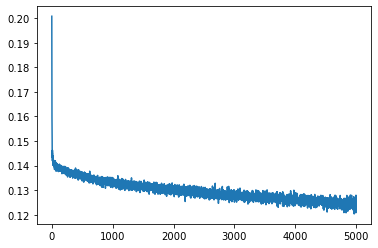

In [37]:
# Convert sets because of tensorflow
X_train = tf.convert_to_tensor(X_train, np.float32)
y_train = tf.convert_to_tensor(y_train, np.float32)

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# Sequential groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.Sequential()

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# Add regular densely-connected NN layer, with input size units (X_train.shape[1])
model.add(tf.keras.layers.Dense(X_train.shape[1], activation=tf.nn.tanh ))
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
# Applies Dropout to the input (of this NN layer) with one fifth rate.
model.add(tf.keras.layers.Dropout(0.2))

# Add another regular densely-connected NN layer, with nearly half of input size units
model.add(tf.keras.layers.Dense(X_train.shape[1]/2, activation=tf.nn.tanh ))
# Applies Dropout to the input (of this NN layer) with one fifth rate.
model.add(tf.keras.layers.Dropout(0.2))

#Add last NN layer, with 1 units that represent the single output
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu ))

# Learning rate
lr = 0.05

# Stochastic Gradient Descent as optimizer
optimizer = tf.optimizers.SGD(lr=lr)
# MeanSquaredError as loss function
loss = tf.losses.MeanSquaredError()

# Compile model
model.compile(loss=loss,
              optimizer=optimizer, 
              metrics=['accuracy'])

# fit the model: do the train...
history = model.fit(X_train, y_train, epochs=5000)
plt.plot(history.history['loss'])

### Train accuracy:

In [38]:
history.history['accuracy'][-1]

0.8245149850845337

### Test accuracy:

In [39]:
results = model.evaluate(
    tf.convert_to_tensor(X_test, np.float32),
    tf.convert_to_tensor(y_test, np.float32), 
    batch_size=128)
print('test acc:', results[1])

14/14 [==============================] - 0s 429us/step - loss: 0.1469 - accuracy: 0.7829
test acc: 0.7828947305679321
